In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline


In [2]:
Athletes_data = pd.read_excel('Athletes.xlsx')
Coaches_data = pd.read_excel('Coaches.xlsx')
EntriesGender_data = pd.read_excel('EntriesGender.xlsx')
Medals_data = pd.read_excel('Medals.xlsx')
Teams_data = pd.read_excel('Teams.xlsx')

/Users/bartlomiejszafran/anaconda3/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Users/bartlomiejszafran/anaconda3/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [3]:
Athletes_data.head()

,Name,NOC,Discipline
0,AALERUD Katrine,Norway,Cycling Road
1,ABAD Nestor,Spain,Artistic Gymnastics
2,ABAGNALE Giovanni,Italy,Rowing
3,ABALDE Alberto,Spain,Basketball
4,ABALDE Tamara,Spain,Basketball


In [4]:
Athletes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11085 entries, 0 to 11084
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        11085 non-null  object
 1   NOC         11085 non-null  object
 2   Discipline  11085 non-null  object
dtypes: object(3)
memory usage: 259.9+ KB


In [5]:
Top20_Discipline_AD = pd.DataFrame(Athletes_data['Discipline'].value_counts()[:20])

In [6]:
Top20_Discipline_AD.head()

,count
Discipline,
Athletics,2068
Swimming,743
Football,567
Rowing,496
Hockey,406


In [7]:
Top20_Discipline_AD = Top20_Discipline_AD.reset_index()

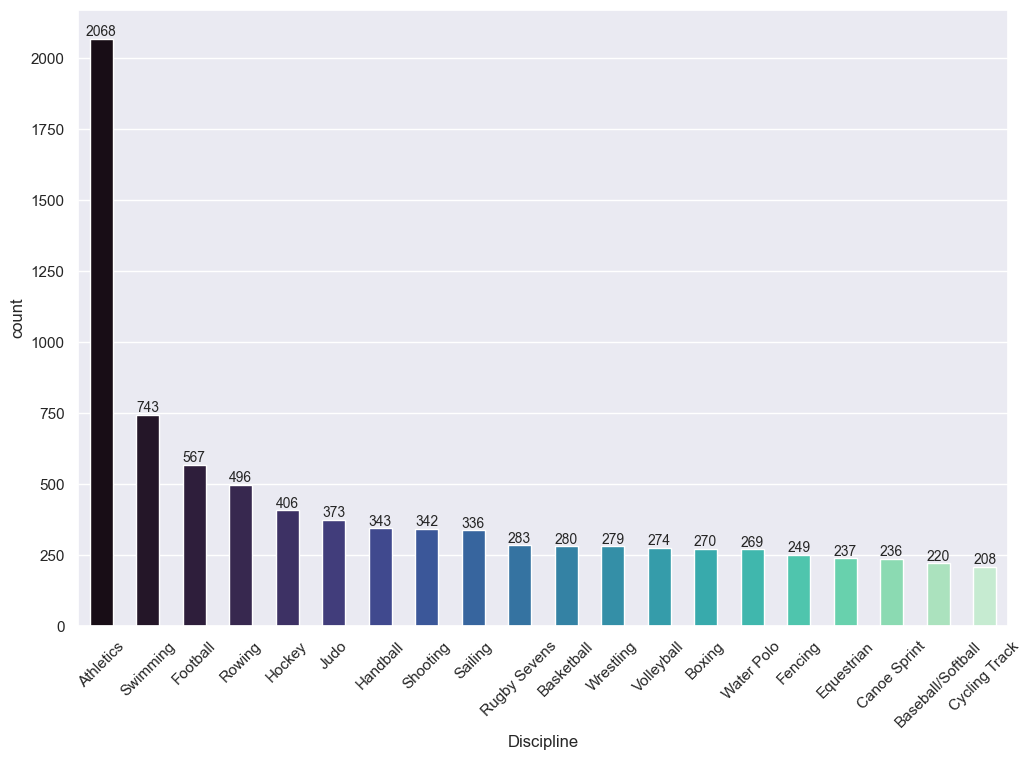

In [8]:
plt.figure(figsize=(12,8))
sns.set_theme()
ax = sns.barplot(data=Top20_Discipline_AD, x='Discipline', y='count',palette='mako', width = 0.5, saturation=1, estimator='sum', errorbar=None)
ax.bar_label(ax.containers[0], fontsize=10)
plt.xticks(rotation= 45)
plt.show()

Dount Chart

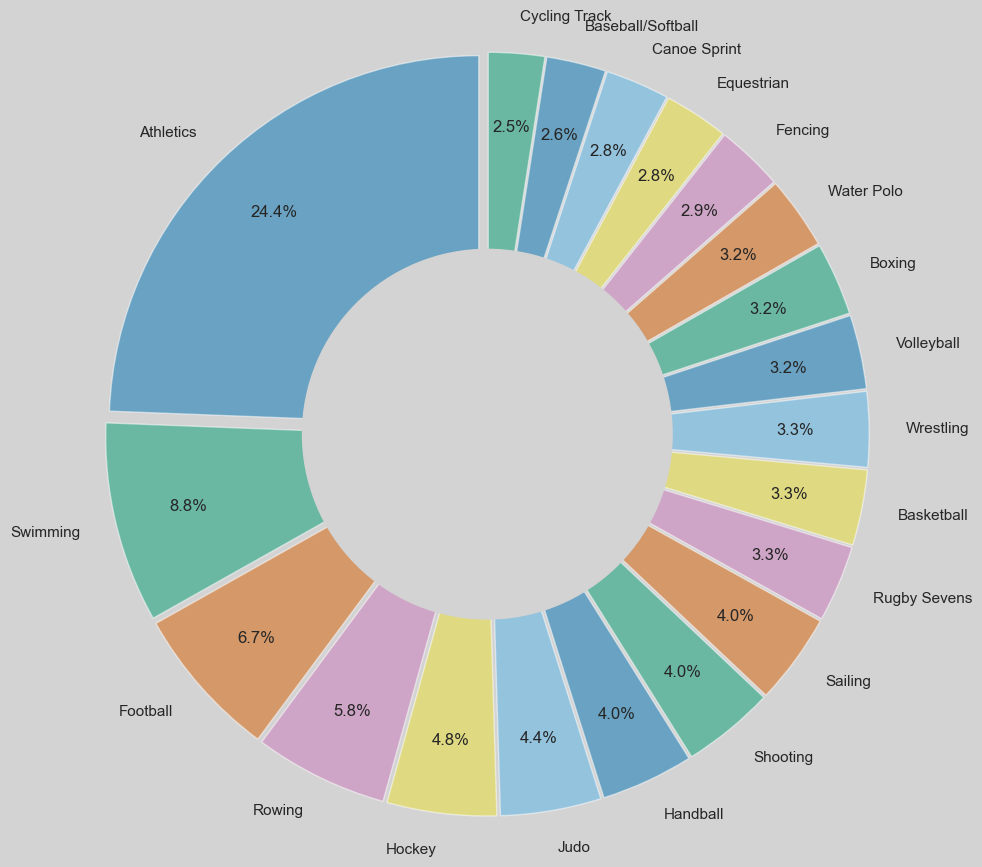

In [9]:
plt.figure(figsize=(12, 8))

plt.pie(Top20_Discipline_AD['count'], labels=Top20_Discipline_AD['Discipline'], autopct='%1.1f%%', radius=1.5, colors=sns.color_palette('colorblind6'),
        startangle=90, pctdistance=0.80, 
        explode=[0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05], wedgeprops={'alpha':0.5})

centre_circle = plt.Circle((0,0), 0.75, fc='lightgrey',edgecolor='lightgrey')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
fig.set_facecolor('lightgrey')
  
plt.show()

In [10]:
Coaches_data.head()

,Name,NOC,Discipline,Event
0,ABDELMAGID Wael,Egypt,Football,NaN
1,ABE Junya,Japan,Volleyball,NaN
2,ABE Katsuhiko,Japan,Basketball,NaN
3,ADAMA Cherif,Côte d'Ivoire,Football,NaN
4,AGEBA Yuya,Japan,Volleyball,NaN


In [11]:
EntriesGender_data.head()

,Discipline,Female,Male,Total
0,3x3 Basketball,32,32,64
1,Archery,64,64,128
2,Artistic Gymnastics,98,98,196
3,Artistic Swimming,105,0,105
4,Athletics,969,1072,2041


/Users/bartlomiejszafran/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:lightblue'` for same effect.
  warnings.warn(msg, FutureWarning)


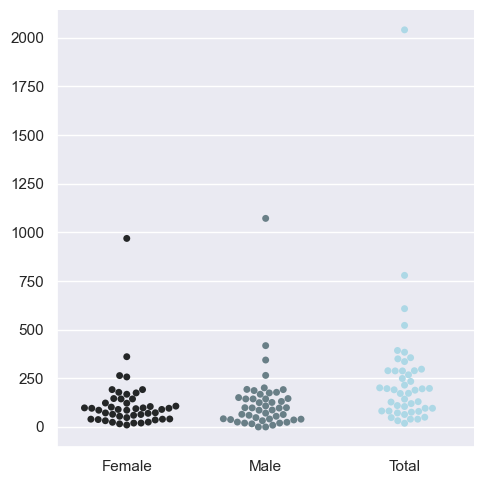

In [12]:
sns.catplot(EntriesGender_data, kind='swarm', color=('lightblue'))
plt.show()

In [13]:
EntriesGender_data = pd.DataFrame(EntriesGender_data)

In [14]:
max_values = EntriesGender_data.loc[EntriesGender_data['Total'].idxmax()]
max_values

Discipline    Athletics
Female              969
Male               1072
Total              2041
Name: 4, dtype: object

In [15]:
total_sum = EntriesGender_data['Total'].sum()
total_sum

11316

In [16]:
male_sum = EntriesGender_data['Male'].sum()
female_sum = EntriesGender_data['Female'].sum()


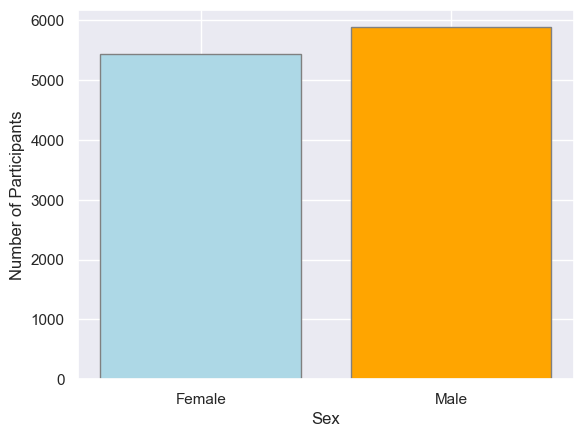

In [17]:
sums = {'Female': female_sum, 'Male': male_sum}
categories = list(sums.keys())
values = list(sums.values())
fig, ax = plt.subplots()
colors = 'lightblue', 'orange'
ax.bar(categories, values, color=colors, edgecolor = 'grey')
plt.xlabel('Sex')
plt.ylabel('Number of Participants')
plt.show()

In [26]:
Teams_data.head()

,Name,Discipline,NOC,Event
0,Belgium,3x3 Basketball,Belgium,Men
1,China,3x3 Basketball,People's Republic of China,Men
2,China,3x3 Basketball,People's Republic of China,Women
3,France,3x3 Basketball,France,Women
4,Italy,3x3 Basketball,Italy,Women


In [80]:
Teams_data['Discipline'].value_counts()

Discipline
Swimming               113
Athletics               79
Cycling Track           64
Archery                 53
Fencing                 52
Beach Volleyball        48
Table Tennis            48
Artistic Swimming       32
Football                28
Artistic Gymnastics     24
Volleyball              24
Basketball              24
Handball                24
Hockey                  24
Rugby Sevens            24
Water Polo              22
Triathlon               18
3x3 Basketball          16
Rhythmic Gymnastics     14
Baseball/Softball       12
Name: count, dtype: int64

In [72]:
Top20 = Teams_data['Discipline'].value_counts()
Top20 = pd.DataFrame(Top20)

In [111]:
discipline_counts = Teams_data['Discipline'].value_counts().reset_index()
discipline_counts.columns = ['Discipline','Count']

In [144]:
fig = px.bar(discipline_counts, x=discipline_counts['Discipline'], y='Count', orientation='v', labels={'discipline':'Discipline'},color_discrete_sequence =['blue']*3)

buttons= [
    dict(label= 1, method ='update', args=[{'x':[discipline_counts.iloc[:1]['Discipline']],'y': [discipline_counts.iloc[:1]['Count']]}]),
    dict(label= 2, method ='update', args=[{'x':[discipline_counts.iloc[1:2]['Discipline']],'y': [discipline_counts.iloc[1:2]['Count']]}]),
    dict(label= 3, method ='update', args=[{'x':[discipline_counts.iloc[2:3]['Discipline']],'y': [discipline_counts.iloc[2:3]['Count']]}]),
    dict(label= 4, method ='update', args=[{'x':[discipline_counts.iloc[3:4]['Discipline']],'y': [discipline_counts.iloc[3:4]['Count']]}]),
    dict(label= 5, method ='update', args=[{'x':[discipline_counts.iloc[4:5]['Discipline']],'y': [discipline_counts.iloc[4:5]['Count']]}]),
    dict(label= 6, method ='update', args=[{'x':[discipline_counts.iloc[5:6]['Discipline']],'y': [discipline_counts.iloc[5:6]['Count']]}]),
    dict(label= 7, method ='update', args=[{'x':[discipline_counts.iloc[6:7]['Discipline']],'y': [discipline_counts.iloc[6:7]['Count']]}]),
    dict(label= 8, method ='update', args=[{'x':[discipline_counts.iloc[7:8]['Discipline']],'y': [discipline_counts.iloc[7:8]['Count']]}]),
    dict(label= 9, method ='update', args=[{'x':[discipline_counts.iloc[8:9]['Discipline']],'y': [discipline_counts.iloc[8:9]['Count']]}]),
    dict(label= 10, method ='update', args=[{'x':[discipline_counts.iloc[9:10]['Discipline']],'y': [discipline_counts.iloc[9:10]['Count']]}]),
    dict(label= 11, method ='update', args=[{'x':[discipline_counts.iloc[10:11]['Discipline']],'y': [discipline_counts.iloc[10:11]['Count']]}]),
    dict(label= 12, method ='update', args=[{'x':[discipline_counts.iloc[11:12]['Discipline']],'y': [discipline_counts.iloc[11:12]['Count']]}]),
    dict(label= 13, method ='update', args=[{'x':[discipline_counts.iloc[12:13]['Discipline']],'y': [discipline_counts.iloc[12:13]['Count']]}]),
    dict(label= 14, method ='update', args=[{'x':[discipline_counts.iloc[13:14]['Discipline']],'y': [discipline_counts.iloc[13:14]['Count']]}]),
    dict(label= 15, method ='update', args=[{'x':[discipline_counts.iloc[14:15]['Discipline']],'y': [discipline_counts.iloc[14:15]['Count']]}]),
    dict(label= 16, method ='update', args=[{'x':[discipline_counts.iloc[15:16]['Discipline']],'y': [discipline_counts.iloc[15:16]['Count']]}]),
    dict(label= 17, method ='update', args=[{'x':[discipline_counts.iloc[16:17]['Discipline']],'y': [discipline_counts.iloc[16:17]['Count']]}]),
    dict(label= 18, method ='update', args=[{'x':[discipline_counts.iloc[17:18]['Discipline']],'y': [discipline_counts.iloc[17:18]['Count']]}]),
    dict(label= 19, method ='update', args=[{'x':[discipline_counts.iloc[18:19]['Discipline']],'y': [discipline_counts.iloc[18:19]['Count']]}]),
    dict(label= 20, method ='update', args=[{'x':[discipline_counts.iloc[19:20]['Discipline']],'y': [discipline_counts.iloc[19:20]['Count']]}]),
    dict(label= 'All', method ='update', args=[{'x':[discipline_counts.iloc[:]['Discipline']],'y': [discipline_counts.iloc[:]['Count']]}]),
    ]

dropdown = go.layout.Updatemenu(
    buttons=buttons,
    direction='down',
    showactive=True,
    x=0.1,
    xanchor='left',
    y=1.15,
    yanchor='top'    
)

fig.update_layout(updatemenus=[dropdown])
fig.update_traces(marker=dict(line=dict(width=0.5, color='LightGrey')))

fig.show()